<a href="https://colab.research.google.com/github/LuuissG/datawarehouse-e-datalake/blob/main/DatasAtualizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importando as bibliotecas pandas como pd e numpy como np
import pandas as pd
import numpy as np

# Definindo o número de produtos como 600
num_produtos = 600

# Criando um dicionário 'produtos' com detalhes do produto como ID, nome e categoria usando valores aleatórios e sequências
produtos = {
    'produto_id': range(1, num_produtos + 1),  # Alterado 'produto id' para 'produto_id'
    'nome': ['Produto {}'.format(i) for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Convertendo o dicionário 'produtos' em um DataFrame pandas chamado 'df_produtos'
df_produtos = pd.DataFrame(produtos)

# Definindo o número de vendas como 1000
num_vendas = 1000

# Criando um dicionário 'data_vendas' com detalhes de vendas como data, ID do produto, quantidade e valor total usando valores aleatórios e sequências
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas),
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas),
    'valor_total': np.random.randint(1000, 10000, num_vendas)
}

# Criando um DataFrame a partir dos dados existentes (data_vendas) usando a biblioteca pandas
df_vendas = pd.DataFrame(data_vendas)

# Salvando o DataFrame df_vendas em um arquivo CSV chamado 'vendas.csv' sem índice
df_vendas.to_csv('vendas.csv', index=False)

# Salvando outro DataFrame (presumivelmente definido anteriormente) df_produtos em um arquivo CSV chamado 'produtos.csv' sem índice
df_produtos.to_csv('produtos.csv', index=False)

# Lendo o arquivo 'vendas.csv' em um DataFrame df_vendas
df_vendas = pd.read_csv('vendas.csv')

# Lendo o arquivo 'produtos.csv' em um DataFrame df_produtos
df_produtos = pd.read_csv('produtos.csv')

# Mesclando os DataFrames df_vendas e df_produtos na coluna 'produto_id' usando o método de junção interna
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Salvando o DataFrame mesclado em um novo arquivo CSV chamado 'data_warehouse.csv' sem índice
df_merge.to_csv('data_warehouse.csv', index=False)

# Lendo o arquivo 'data_warehouse.csv' em um novo DataFrame df_warehouse
df_warehouse = pd.read_csv('data_warehouse.csv')

# Imprimindo "Conteúdo do Data Warehouse:"
print("Conteúdo do Data Warehouse:")

# Imprimindo o conteúdo do DataFrame df_warehouse
print(df_warehouse)


Conteúdo do Data Warehouse:
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-09         105         185         3194  Produto 105    Alimentos
1    2024-04-20         144         118         9180  Produto 144       Roupas
2    2024-04-15         144         171         9213  Produto 144       Roupas
3    2024-04-29         130         180         1706  Produto 130       Roupas
4    2024-04-03         130         109         2110  Produto 130       Roupas
..          ...         ...         ...          ...          ...          ...
995  2024-04-17         141          92         1130  Produto 141  Eletrônicos
996  2024-04-02         437         124         1996  Produto 437    Alimentos
997  2024-04-28         505         173         6049  Produto 505       Roupas
998  2024-04-04         311         165         3702  Produto 311    Alimentos
999  2024-04-21         409         163         9366  Produto 409  Eletrônicos

[1000 rows x 6 columns]

Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 100          91         9058
Produto 102         143         9218
Produto 103         496        20689
Produto 104         131         5731
Produto 105         185         3194
...                 ...          ...
Produto 94          171         7767
Produto 95          271        16180
Produto 96          321        19456
Produto 98          156         9043
Produto 99          199         2805

[477 rows x 2 columns]
Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         41113      1802623
Eletrônicos       36866      1662817
Roupas            45697      1960326
Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        4939       183722
2024-04-02        5090       212363
2024-04-03        4980       230998
2024-04-04        3110

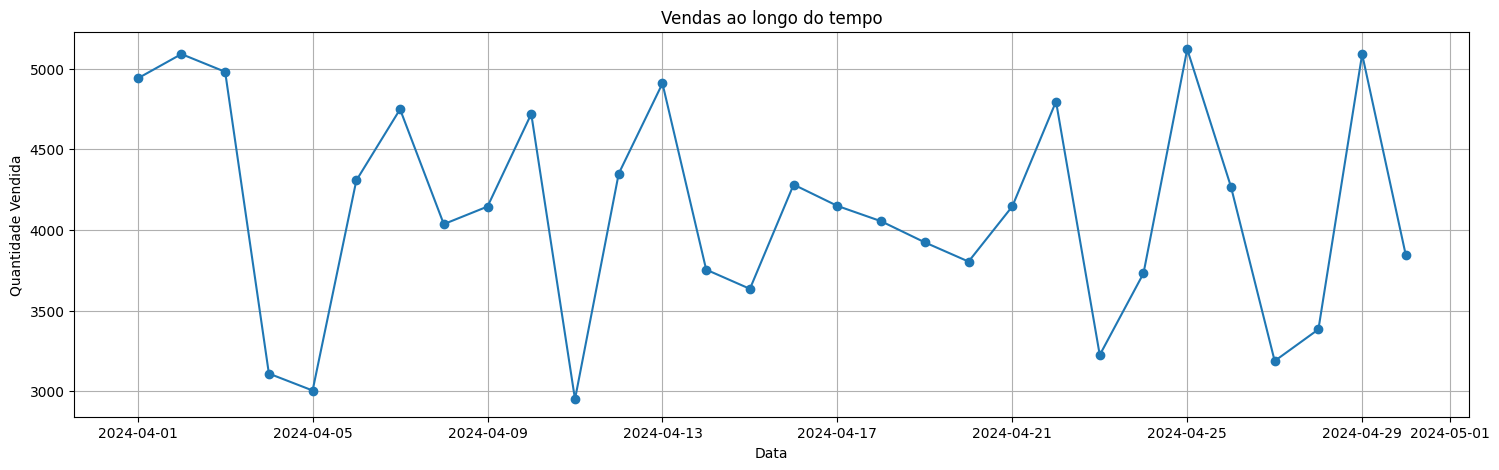

Análise de desempenho de produtos:
nome
Produto 100     9058
Produto 102     9218
Produto 103    20689
Produto 104     5731
Produto 105     3194
               ...  
Produto 94      7767
Produto 95     16180
Produto 96     19456
Produto 98      9043
Produto 99      2805
Name: valor_total, Length: 477, dtype: int64


In [6]:
# Importando as bibliotecas pandas e matplotlib.pyplot com os aliases pd e plt, respectivamente
import pandas as pd
import matplotlib.pyplot as plt

# Lendo um arquivo CSV chamado 'data_warehouse.csv' em um DataFrame df_warehouse
df_warehouse = pd.read_csv('data_warehouse.csv')

# Agrupando o DataFrame por nome do produto e calculando a soma de 'quantidade' e 'valor_total' para cada produto
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()

# Imprimindo a análise de vendas por produto
print("Análise de vendas por produto:")
print(vendas_por_produto)

# Agrupando o DataFrame por categoria do produto e calculando a soma de 'quantidade' e 'valor_total' para cada categoria
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()

# Imprimindo a análise de vendas por categoria de produto
print("Análise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Convertendo a coluna 'data' para o formato datetime
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])

# Agrupando o DataFrame por data e calculando a soma de 'quantidade' e 'valor_total' para cada data
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()

# Imprimindo a análise de tendências temporais
print("Análise de tendências temporais:")
print(vendas_por_data)

# Criando um gráfico de vendas ao longo do tempo
plt.figure(figsize=(18, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

# Agrupando o DataFrame por nome do produto e calculando a soma de 'valor_total' para cada produto
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()

# Imprimindo a análise de desempenho de produtos
print("Análise de desempenho de produtos:")
print(desempenho_produto)


In [7]:
# Importando a biblioteca pandas como pd e a biblioteca numpy como np
import pandas as pd
import numpy as np

# Importando o módulo os para interagir com o sistema operacional
import os

# Verificando se um diretório chamado 'data_lake' existe, se não, ele cria um
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# Definindo o número de arquivos a serem criados como 10
num_files = 10

# Definindo o número de linhas por arquivo como 1000
num_rows_per_file = 1000

# Criando uma lista vazia chamada dfs para armazenar objetos DataFrame
dfs = []

# Loop através de um intervalo igual a num_files (10 neste caso)
for i in range(num_files):

    # Criando um dicionário chamado data com três pares chave-valor, onde as chaves são nomes de colunas
    # e os valores são arrays de números ou letras aleatórios gerados usando numpy
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # Cria um dataframe chamado df, a partir do conjunto de dados chamados data.
    df = pd.DataFrame(data)

    # É o nome do arquivo gerado, e irá aumentando cada vez que ele vai criando
    file_name = f'data_lake/dados_{i+1}.csv'
    # Salvando o dataframe como arquivo CSV no local especificado
    df.to_csv(file_name, index=False)

    # Aqui salva o nome e adiciona o nome do arquivo e o dataframe é adicionado a lista dfs.
    dfs.append((file_name, df))

print("Dados do Data Lake gerados com sucesso!")

# ste é o início de um loop que percorre cada tupla na lista dfs. Cada tupla contém um nome de arquivo e um DataFrame.
for file_name, df in dfs:
    # Dentro do loop, esta linha imprime o nome do arquivo atual.
    print(f"Dados do Arquivo: {file_name}")
    #  Esta linha imprime as primeiras cinco linhas do DataFrame atual.
    print(df.head())


Dados do Data Lake gerados com sucesso!
Dados do Arquivo: data_lake/dados_1.csv
   coluna1   coluna2 coluna3
0       61 -0.494387       B
1       42 -0.797471       B
2       37 -0.549583       B
3       66 -0.511817       B
4       29  1.056959       A
Dados do Arquivo: data_lake/dados_2.csv
   coluna1   coluna2 coluna3
0       98 -1.067534       B
1       55  0.113692       A
2       29  1.032249       C
3       91 -0.726016       A
4       33  1.789408       A
Dados do Arquivo: data_lake/dados_3.csv
   coluna1   coluna2 coluna3
0       66 -0.506363       C
1       51  0.891112       B
2       53  0.453838       B
3       18 -1.027635       B
4       79 -1.318320       C
Dados do Arquivo: data_lake/dados_4.csv
   coluna1   coluna2 coluna3
0        1  0.724277       C
1       35  0.587945       C
2        0 -0.593318       B
3       46 -0.306845       A
4       87  0.476584       B
Dados do Arquivo: data_lake/dados_5.csv
   coluna1   coluna2 coluna3
0       20 -0.257019       B
1     

In [8]:
# Importa a biblioteca pandas, que é usada para manipulação e análise de dados.
import pandas as pd

# Importa a biblioteca numpy, que é usada para trabalhar com arrays.
import numpy as np

# Importa o módulo os, que fornece funções para interagir com o sistema operacional.
import os

# Importa a função create_engine da biblioteca sqlalchemy, que é usada para criar uma conexão com um banco de dados.
from sqlalchemy import create_engine

# Verifica se o diretório 'data_lake' existe.
if not os.path.exists('data_lake'):
    # Se o diretório 'data_lake' não existir, ele é criado.
    os.makedirs('data_lake')

# Define o número de arquivos que serão criados.
num_files = 10

# Define o número de linhas que cada arquivo terá.
num_rows_per_file = 1000

# Cria uma lista vazia para armazenar os DataFrames que serão criados.
dfs = []

# Inicia um loop que será executado num_files vezes.
for i in range(num_files):
    # Cria um dicionário com os dados que serão usados para criar o DataFrame.
    data = {
        # Cria uma coluna de números inteiros aleatórios entre 0 e 100.
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        # Cria uma coluna de números reais aleatórios seguindo uma distribuição normal.
        'coluna2': np.random.randn(num_rows_per_file),
        # Cria uma coluna de letras aleatórias escolhidas entre 'A', 'B' e 'C'.
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # Cria um DataFrame usando o dicionário de dados.
    df = pd.DataFrame(data)

    # Define o nome do arquivo onde o DataFrame será salvo.
    file_name= f'data_lake/dados_{i+1}.csv'

    # Salva o DataFrame em um arquivo CSV.
    df.to_csv(file_name, index=False)

    # Adiciona o DataFrame à lista dfs.
    dfs.append(df)

# Imprime uma mensagem indicando que os dados foram gerados com sucesso.
print("Dados do Data Lake Gerados com sucesso!")

# Define a string de conexão para o banco de dados.
conn_string = 'sqlite:///data_lake.db'

# Cria uma conexão com o banco de dados.
engine = create_engine(conn_string)

# Inicia um loop para cada DataFrame na lista dfs.
for i, df in enumerate(dfs, 1):
    # Define o nome da tabela onde o DataFrame será salvo.
    table_name = f'dados_{i}'

    # Salva o DataFrame em uma tabela no banco de dados.
    df.to_sql(table_name, engine, index=False)


Dados do Data Lake Gerados com sucesso!


Primeiras linhas do DataFrame:
   coluna1   coluna2 coluna3
0       35  0.415995       B
1       85  1.065847       C
2       74  1.569242       C
3       73 -0.806331       C
4       53 -0.832539       B

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     48.885000     0.051034
std      28.450716     1.022719
min       0.000000    -4.189923
25%      24.000000    -0.654709
50%      48.000000    -0.004755
75%      74.000000     0.733119
max      99.000000     3.153711


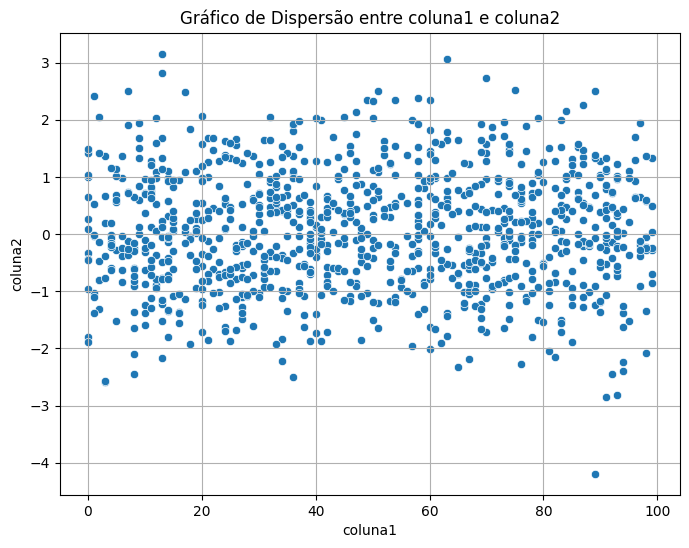

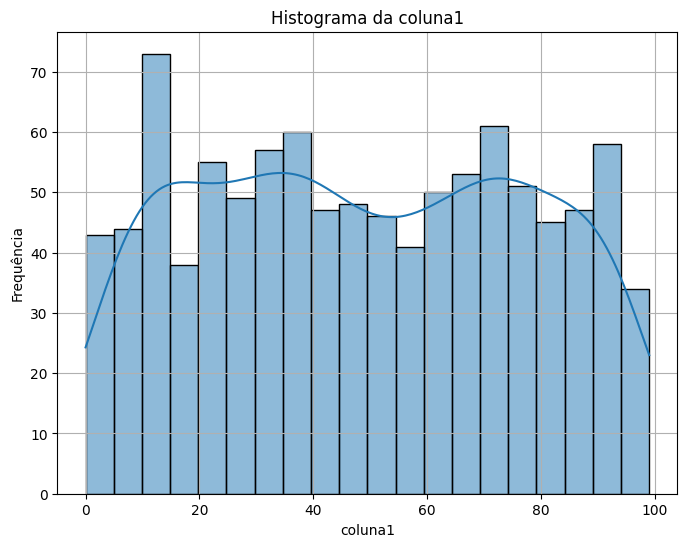

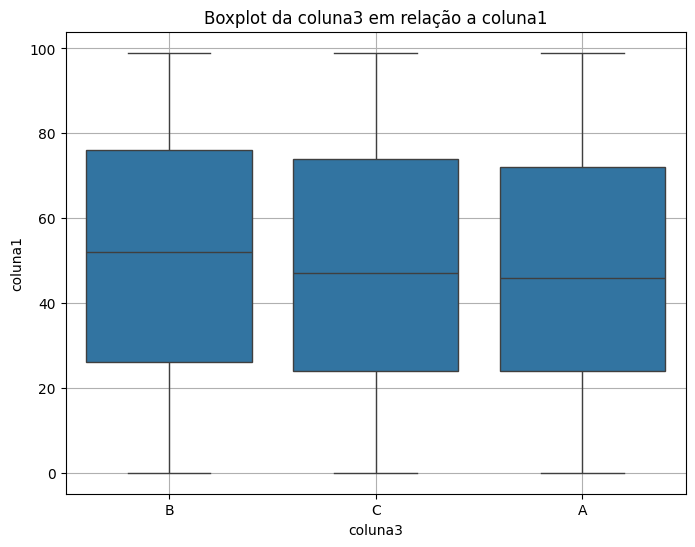

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Criar uma conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Carregar dados do banco de dados para um DataFrame
table_name = 'dados_1'
df = pd.read_sql_table(table_name, engine)

# Imprimir as primeiras linhas do DataFrame para visualização rápida
print("Primeiras linhas do DataFrame:")
print(df.head())

# Imprimir informações detalhadas sobre o DataFrame, incluindo tipos de dados e uso de memória
print("\nInformações sobre o DataFrame:")
print(df.info())

# Imprimir um resumo estatístico do DataFrame, incluindo medidas de tendência central e dispersão
print("\nResumo estatístico do DataFrame:")
print(df.describe())

# Criar um gráfico de dispersão para visualizar a relação entre 'coluna1' e 'coluna2'
plt.figure(figsize=(8,6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title("Gráfico de Dispersão entre coluna1 e coluna2")
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Criar um histograma da distribuição da 'coluna1' com 20 bins e KDE (Kernel Density Estimation)
plt.figure(figsize=(8,6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar um boxplot para identificar a distribuição de 'coluna1' em diferentes categorias de 'coluna3'
plt.figure(figsize=(8,6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação a coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()
